In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Whole Dataset

In [7]:
whole_df = pd.read_csv("whole_dataset.csv")
whole_df

,Group Name,Model,Feature Set,Test AUC,Test Accuracy
0,whole_dataset,NN,Image Features,70.98,64.99
1,whole_dataset,LR,Image Features,71.98,65.80
2,whole_dataset,NN,Image and Self Reported Features,71.98,65.67
3,whole_dataset,LR,Image and Self Reported Features,72.71,66.36
4,whole_dataset,NN,Image and Extracted Features,71.38,65.40
5,whole_dataset,LR,Image and Extracted Features,72.30,66.12
6,whole_dataset,NN,"Image, Self-reported and Extracted Features",71.77,65.75
7,whole_dataset,LR,"Image, Self-reported and Extracted Features",73.04,66.65


In [8]:
whole_df['Feature Set'].unique()

array(['Image Features', 'Image and Self Reported Features',
       'Image and Extracted Features',
       'Image, Self-reported and Extracted Features'], dtype=object)

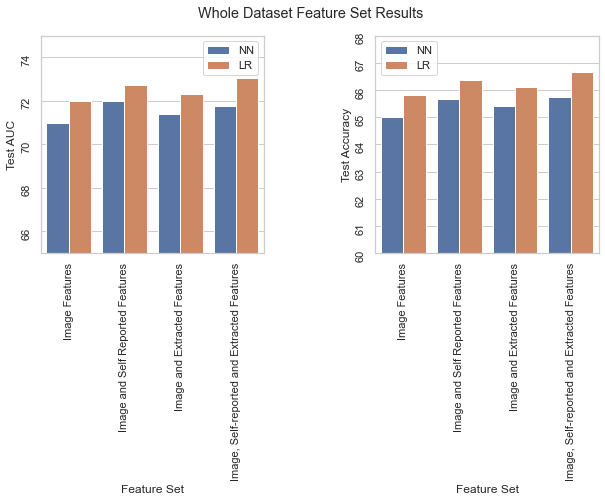

In [9]:
fig, (ax1, ax2)= plt.subplots(1,2)
fig.set_size_inches(10, 4)
plt.suptitle("Whole Dataset Feature Set Results")
sns.barplot(x='Feature Set',y='Test AUC', data=whole_df, hue='Model', ax=ax1)
sns.barplot(x='Feature Set',y='Test Accuracy', data=whole_df, hue='Model',ax=ax2)
plt.subplots_adjust(wspace=0.5)
ax1.tick_params(rotation = 90)
ax2.tick_params(rotation =90)
ax2.legend(loc = "best" ,ncol=1)
ax1.legend(loc = "best" ,ncol=1)
ax1.set_ylim(65, 75)
ax2.set_ylim(60, 68)
fig.savefig("Results_EDA/Whole dataset.PNG")

# Country Gender DB Segment 

In [10]:
segment_df = pd.read_csv("Country_gender_db_segment.csv")

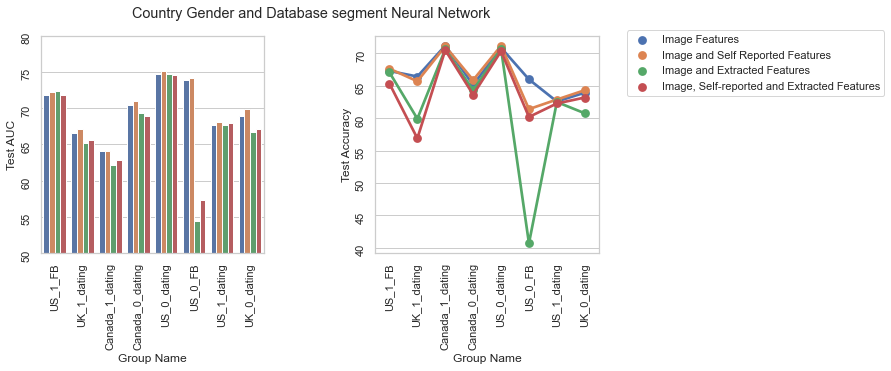

In [11]:
fig, (ax1, ax2)= plt.subplots(1,2)
fig.set_size_inches(10, 4)
plt.suptitle("Country Gender and Database segment Neural Network")
sns.barplot(hue='Feature Set',y='Test AUC', data=segment_df[segment_df['Model']=="NN"], x='Group Name', ax=ax1)
sns.pointplot(hue='Feature Set',y='Test Accuracy', data=segment_df[segment_df['Model']=="NN"], x='Group Name',ax=ax2)
ax1.get_legend().remove()
plt.subplots_adjust(wspace=0.5)
ax1.tick_params(rotation = 90)
ax2.tick_params(rotation =90)
ax2.legend(bbox_to_anchor=(1.1, 1.05))
ax1.set_ylim(50, 80)
fig.savefig("Results_EDA/segment_groups_NN.PNG")

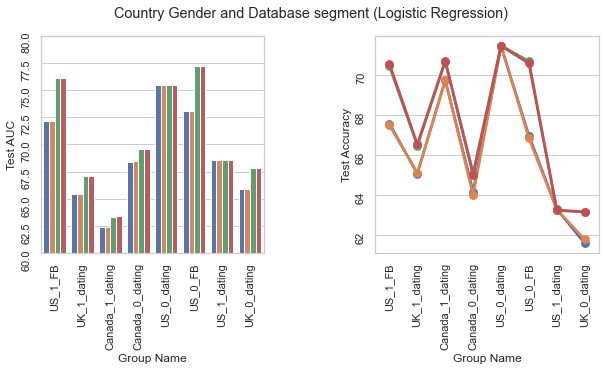

In [12]:
fig, (ax1, ax2)= plt.subplots(1,2)
fig.set_size_inches(10, 4)
plt.suptitle("Country Gender and Database segment (Logistic Regression)")
sns.barplot(hue='Feature Set',y='Test AUC', data=segment_df[segment_df['Model']=="LR"], x='Group Name', ax=ax1)
sns.pointplot(hue='Feature Set',y='Test Accuracy', data=segment_df[segment_df['Model']=="LR"], x='Group Name',ax=ax2)
# plt.legend(loc='center', bbox_to_anchor=(0.7, -0.53),
#           fancybox=True, shadow=True, ncol=5)
ax2.get_legend().remove()
ax1.get_legend().remove()
plt.subplots_adjust(wspace=0.5)
ax1.tick_params(rotation = 90)
ax2.tick_params(rotation =90)
# ax2.legend(bbox_to_anchor=(1.1, 1.05))
ax1.set_ylim(60, 80)
fig.savefig("Results_EDA/segment_groups_LR.PNG")

# Ethnicity (Top 5 and Bottom 5 segments )

In [13]:
ethnicity_df = pd.read_csv("ethnicity_groups.csv")

In [14]:
lr_ethnicity = ethnicity_df[ethnicity_df['Model']=='LR']
nn_ethnicity = ethnicity_df[ethnicity_df['Model']=='NN']

# LR MODEL

In [16]:
lr_ethin_df_sorted = lr_ethnicity.sort_values(by = ['Test AUC'])

lr_ethin_df_sorted_top = lr_ethin_df_sorted.tail(5)
lr_ethin_df_sorted_lowest = lr_ethin_df_sorted.head(5)
lr_ethin_df_sorted_lowest.index = ["low","low","low","low","low"]
lr_ethin_df_sorted_top.index = ['top','top','top','top','top']
df = pd.concat([lr_ethin_df_sorted_lowest,lr_ethin_df_sorted_top], axis = 0 )

df_low_top = df.sort_values(by=['Test AUC'],ascending=False)
df_low_top.to_csv("Results_EDA/ethnicity group LR.csv")

# NN MODEL

In [17]:
lr_ethin_df_sorted = nn_ethnicity.sort_values(by= ['Test AUC'])
lr_ethin_df_sorted_top = lr_ethin_df_sorted.tail(5)
lr_ethin_df_sorted_lowest = lr_ethin_df_sorted.head(5)
lr_ethin_df_sorted_lowest.index = ["low","low","low","low","low"]
lr_ethin_df_sorted_top.index = ['top','top','top','top','top']
df = pd.concat([lr_ethin_df_sorted_lowest,lr_ethin_df_sorted_top], axis = 0 )

df_low_top = df.sort_values(by=['Test AUC'],ascending=False)
df_low_top.to_csv("Results_EDA/ethnicity group NN.csv")